<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/01Regressione/02RegressioneLineareMultipla/regressioneLineareMultipla01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressione lineare multipla
**Author: Cristiano Casadei**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# importiamo il dataset direttamente dalla URL dove è archiviato
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                      # indichiamo che il file utilizza un numero indefinito di spazi come separatore di colonna
                      sep="\s+",
                      # assegniamo i nomi alle colonne (questa volte le utilizziamo tutte!)
                      # utilizzo la nomenclatura suggerita dallo stesso fornitore
                      # che si trova a questo indirizzo
                      # https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
                      #
                      #  0. CRIM     per capita crime rate by town
                      #  1. ZN       proportion of residential land zoned for lots over  25,000 sq.ft.
                      #  2. INDUS    proportion of non-retail business acres per town
                      #  3. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                      #  4. NOX      nitric oxides concentration (parts per 10 million)
                      #  5. RM       average number of rooms per dwelling
                      #  6. AGE      proportion of owner-occupied units built prior to 1940
                      #  7. DIS      weighted distances to five Boston employment centres
                      #  8. RAD      index of accessibility to radial highways
                      #  9. TAX      full-value property-tax rate per $10,000
                      # 10. PTRATIO  pupil-teacher ratio by town
                      # 11. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                      # 12. LSTAT    % lower status of the population
                      # 13. MEDV     Median value of owner-occupied homes in $1000's
                      names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PRATIO", "B", "LSTAT", "MEDV"])

# diamo un'occhiata al dataset (solo le prime righe)
print("Diamo uno sguardo al dataset...")
dataset.head()

Diamo uno sguardo al dataset...


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# diamo uno sguardo ai tipi dati
print("Diamo uno sguardo ai tipi dato...")
dataset.info()

Diamo uno sguardo ai tipi dato...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    float64
 10  PRATIO  506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# valutiamo il grado di correlazione tra le proprietà del dataset
print("Grado di correlazione")
dataset.corr()

Grado di correlazione


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

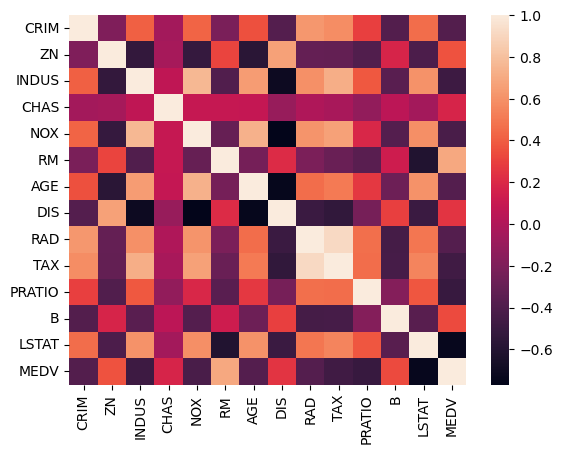

In [5]:
# creiamo una heatmap delle correlazioni con seaborn
# i parametri xticklabels e yticklabels servono a fornire il nome di righe e colonne
# forniremo per entrambe l'elenco dei nomi colonna del dataset
sns.heatmap(dataset.corr(), xticklabels=dataset.columns, yticklabels=dataset.columns)

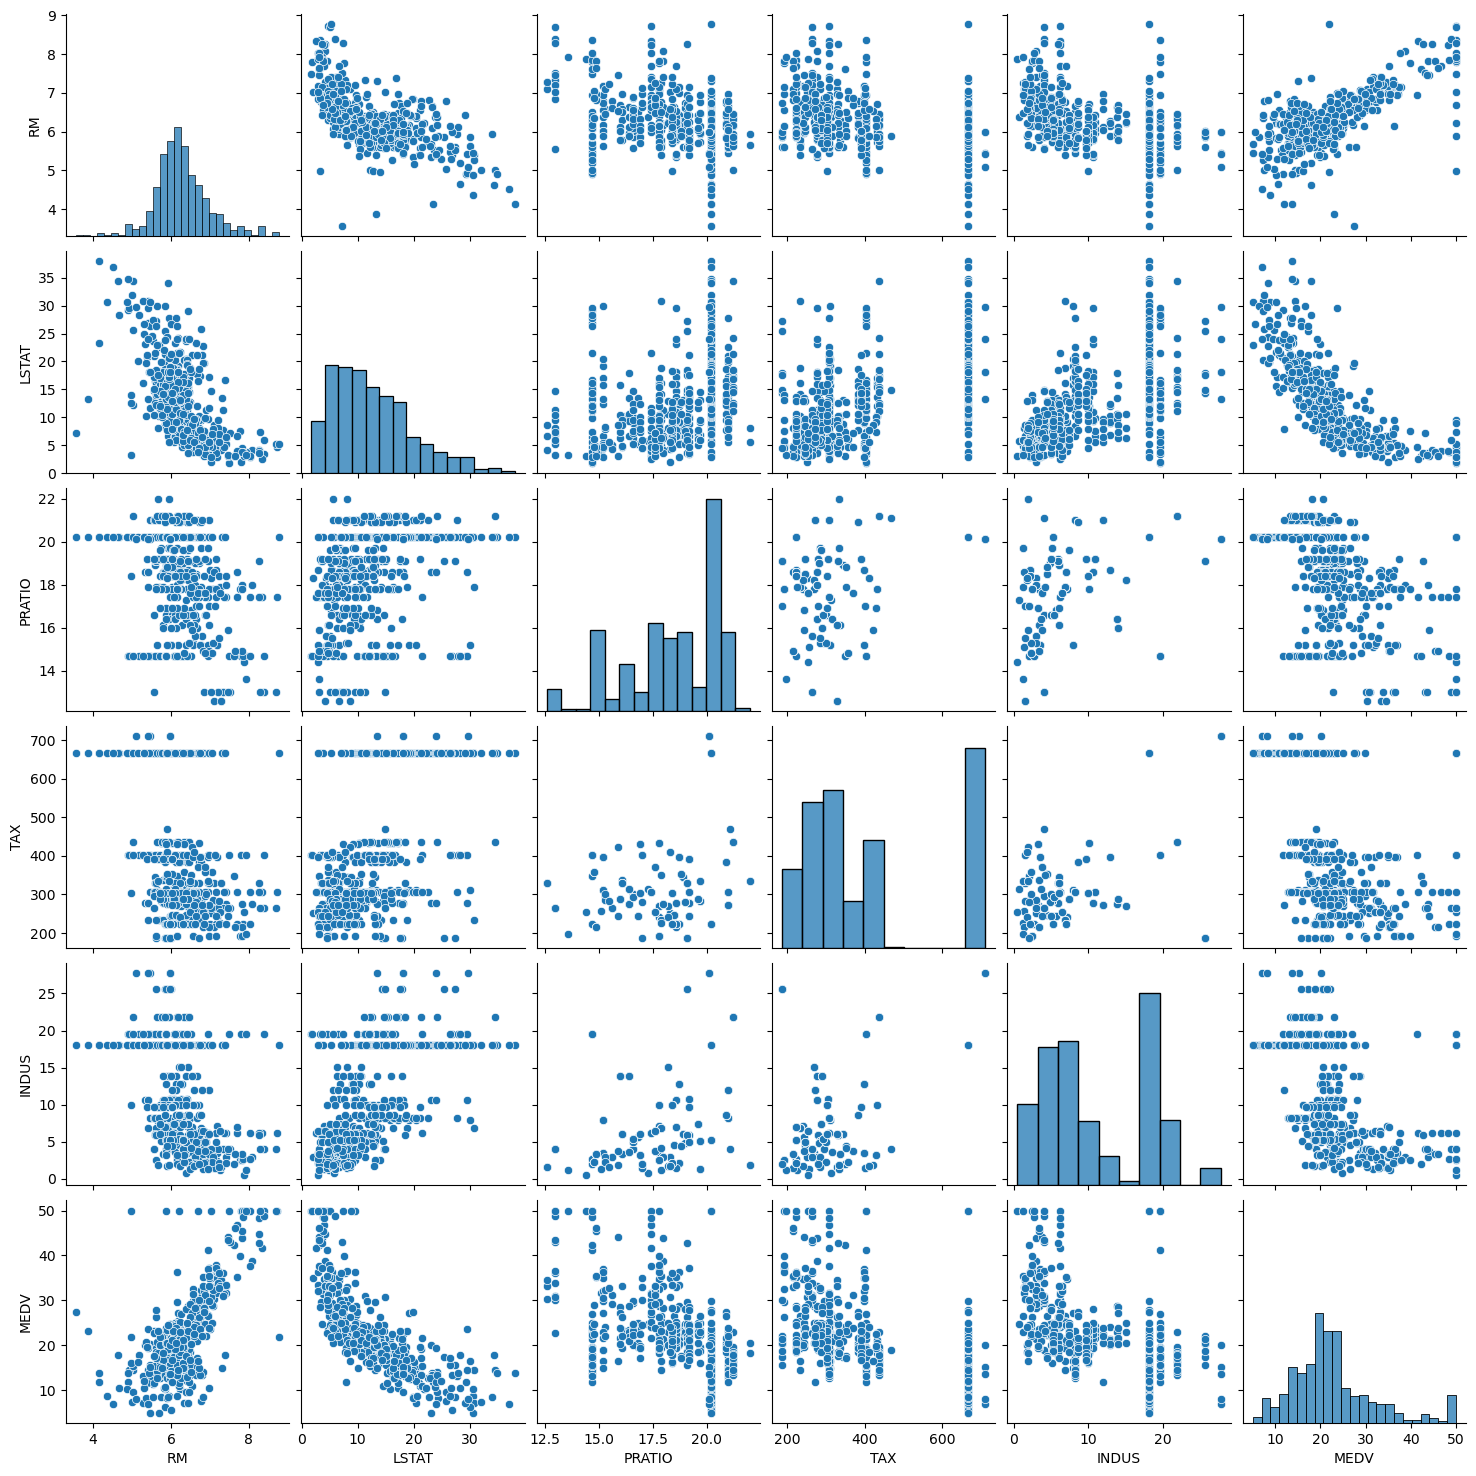

In [6]:
# creiamo i grafici delle combinazioni di coppie di proprietà
# NOTA: visto che il grafico diventerebbe enorme, selezioniamo solo le colonne che reputiamo
# più promettenti dopo aver analizzato la heatmap precedente, oltre al nostro valore di uscita
sns.pairplot(dataset[["RM", "LSTAT", "PRATIO", "TAX", "INDUS", "MEDV"]])

In [7]:
# associamo ad X i valori di input delle colonne che reputiamo più promettenti
# associamo ad Y i valori di output
X = dataset[["RM", "LSTAT"]].values
Y = dataset["MEDV"].values

# suddividiamo il dataset in due dataset, uno di training ed uno di test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# istanziamo la classe di calcolo della regressione lineare di SciKitLearn
# la addestriamo e prediciamo i valori con il set di test
lRegr = LinearRegression()
lRegr.fit(X_train, Y_train)
Y_pred = lRegr.predict(X_test)

# calcoliamo l'errore quadratico medio e il coefficiente di determinazione
errore = mean_squared_error(Y_test, Y_pred)
punteggio = r2_score(Y_test, Y_pred)
print("Errore:", errore)
print("Score:", punteggio)

# visualizziamo i valori dei pesi e del bias trovati
print("Valore del peso di RM:", lRegr.coef_[0])
print("Valore del peso di LSTAT:", lRegr.coef_[1])
print("Valore del bias:", lRegr.intercept_)

Errore: 34.5074169739437
Score: 0.6439180890867688
Valore del peso di RM: 4.777646462662193
Valore del peso di LSTAT: -0.6370375165175153
Valore del bias: 0.18138586982333393


In [8]:
# Ok, ora applichiamo in ingresso TUTTE le proprietà del dataset, tranne quella di output che andrà in Y
X = dataset.drop("MEDV", axis=1).values
Y = dataset["MEDV"].values

# suddividiamo il dataset in due dataset, uno di training ed uno di test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# istanzio la classe di standardizzazione
# standardizzo il train set, creando un modello di standardizzazione in base ai suoi dati
# riutilizzo lo stesso modello di standardizzazione sul test set, in modo da mantenere uniformità tra i due set
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# istanziamo la classe di calcolo della regressione lineare di SciKitLearn
# la addestriamo e prediciamo i valori con il set di test
lRegr = LinearRegression()
lRegr.fit(X_train_std, Y_train)
Y_pred = lRegr.predict(X_test_std)

# calcoliamo l'errore quadratico medio e il coefficiente di determinazione
errore = mean_squared_error(Y_test, Y_pred)
punteggio = r2_score(Y_test, Y_pred)
print("Errore:", errore)
print("Score:", punteggio)

# visualizziamo i valori dei pesi (con i rispettivi nomi delle colonne) e del bias trovati
print("Valore dei pesi:", list(zip(dataset.columns, lRegr.coef_)))
print("Valore del bias:", lRegr.intercept_)

Errore: 25.954379253332803
Score: 0.6695580581366007
Valore dei pesi: [('CRIM', -1.1242130445709322), ('ZN', 1.3079255793314999), ('INDUS', -0.32175256057121865), ('CHAS', 1.0179533133801841), ('NOX', -2.079084998126516), ('RM', 2.8115432016105837), ('AGE', -0.16587096562822332), ('DIS', -3.4301554279581747), ('RAD', 2.6430133665881566), ('TAX', -1.7453117472450526), ('PRATIO', -1.9708434850261127), ('B', 0.794412853071338), ('LSTAT', -3.5048119386546306)]
Valore del bias: 22.71638418079096
